In [1]:
import matplotlib.pyplot as plt
import pandas
import pandas as pd
import scipy.stats as stats
import seaborn as sns

i = 0

In [2]:
def open_file(name: str):
    data = pd.read_csv(name)
    df = pd.DataFrame(data, columns=['debt_to_income', 'emp_length'])
    df = df.dropna(axis=0, how='any')
    return [data, df]

In [3]:
def boxplot_refill(data: pandas.Series):
    iqr = data.quantile(0.75) - data.quantile(0.25)
    upper = data.quantile(0.75) + 1.5 * iqr
    lower = data.quantile(0.25) - 1.5 * iqr

    def trans(x):
        global i
        if x > upper:
            i += 1
            return pandas.NA
        elif x < lower:
            i += 1
            return pandas.NA
        else:
            return x

    return data.map(trans)

In [4]:
temp = open_file("loans_full_schema.csv")

In [5]:
data=temp[1]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9182 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   debt_to_income  9182 non-null   float64
 1   emp_length      9182 non-null   float64
dtypes: float64(2)
memory usage: 215.2 KB


c:\users\gahty\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='emp_length'>

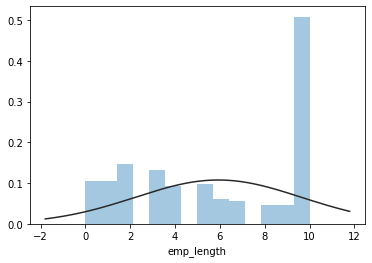

In [6]:
sns.distplot(data['emp_length'], hist=True, kde=False, fit=stats.norm,)

c:\users\gahty\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='debt_to_income'>

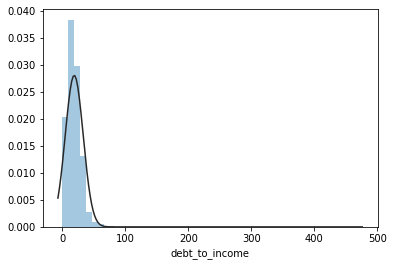

In [7]:
sns.distplot(data['debt_to_income'], hist=True, kde=False, fit=stats.norm,)

<AxesSubplot:>

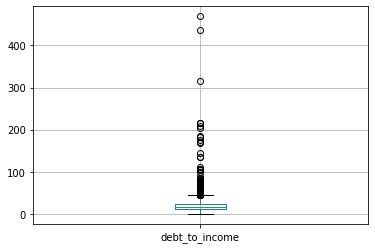

In [8]:
data[['debt_to_income']].boxplot()

<AxesSubplot:>

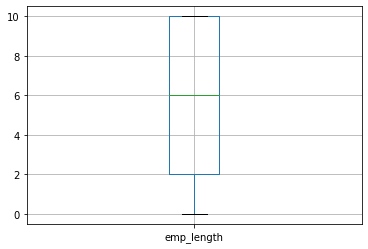

In [9]:
data[['emp_length']].boxplot()

In [10]:
data['debt_to_income'] = boxplot_refill(data['debt_to_income'])
data = data.dropna(axis=0, how='any')
data = data.astype('float')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8998 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   debt_to_income  8998 non-null   float64
 1   emp_length      8998 non-null   float64
dtypes: float64(2)
memory usage: 210.9 KB


c:\users\gahty\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='debt_to_income'>

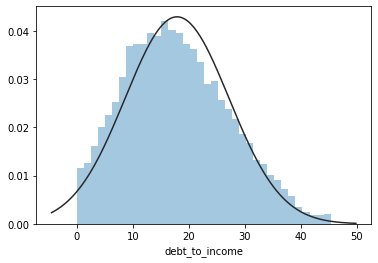

In [11]:
sns.distplot(data['debt_to_income'], hist=True, kde=False, fit=stats.norm,)

<AxesSubplot:>

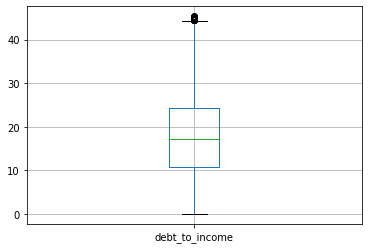

In [12]:
data[['debt_to_income']].boxplot()

In [13]:
stats.spearmanr(data['debt_to_income'], data['emp_length'])

SpearmanrResult(correlation=0.06075942621573226, pvalue=8.020194236425956e-09)

In [39]:
temp[0].corr(method='spearman')['debt_to_income']

emp_length                          0.057015
annual_income                      -0.196034
debt_to_income                      1.000000
annual_income_joint                -0.082224
debt_to_income_joint                0.591942
delinq_2y                          -0.039922
months_since_last_delinq            0.053911
earliest_credit_line               -0.110948
inquiries_last_12m                  0.040340
total_credit_lines                  0.307065
open_credit_lines                   0.347382
total_credit_limit                  0.217343
total_credit_utilized               0.510795
num_collections_last_12m           -0.016313
num_historical_failed_to_pay       -0.001719
months_since_90d_late               0.044564
current_accounts_delinq             0.012756
total_collection_amount_ever       -0.027936
current_installment_accounts        0.468902
accounts_opened_24m                 0.128383
months_since_last_credit_inquiry    0.029744
num_satisfactory_accounts           0.346720
num_accoun

In [43]:
all=temp[0].corr(method='spearman')['debt_to_income']
for i,v in all.items():
    if v<1.0 and v>0.3 or v<-0.3 and v>-1:
        continue
    else:
        all[i]=pd.NA

all=all.dropna(axis=0, how='any')    
type(all)

pandas.core.series.Series

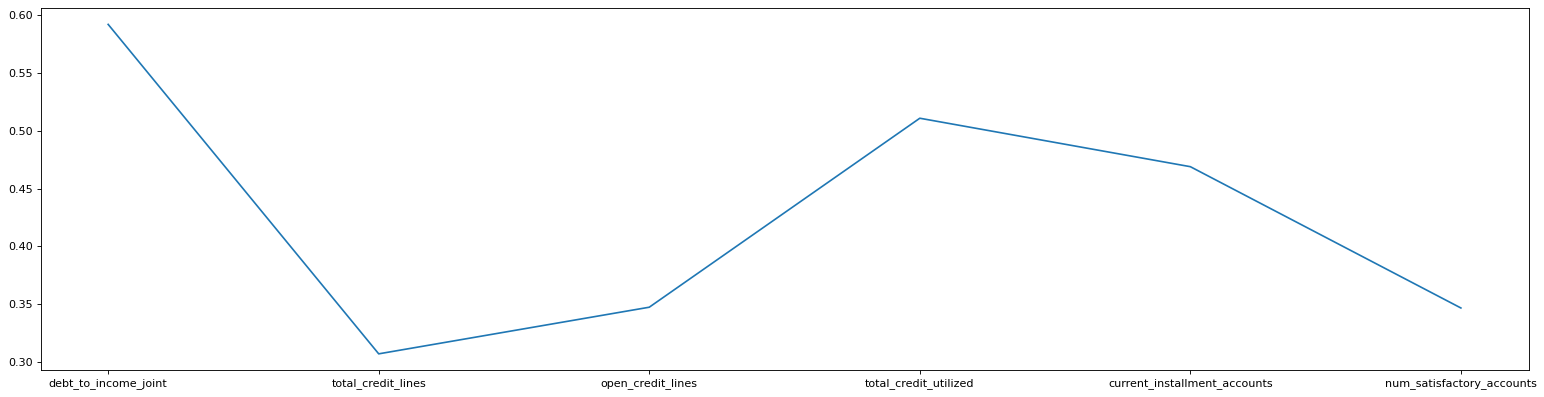

In [44]:
plt.figure(figsize=(24, 6), dpi=80)
plt.plot(all)

In [46]:
ndf = pd.DataFrame(temp[0], columns=['debt_to_income', 'total_credit_utilized','total_credit_lines','open_credit_lines','current_installment_accounts','num_satisfactory_accounts'])
ndf = ndf.dropna(axis=0, how='any')
stats.spearmanr(ndf['debt_to_income'], ndf['total_credit_utilized'])

SpearmanrResult(correlation=0.5107945670898851, pvalue=0.0)

In [48]:
stats.spearmanr(ndf['debt_to_income'], ndf['total_credit_lines'])

SpearmanrResult(correlation=0.30706496038372655, pvalue=8.364822782460385e-217)

In [49]:
stats.spearmanr(ndf['debt_to_income'], ndf['open_credit_lines'])

SpearmanrResult(correlation=0.3473818689466494, pvalue=6.864259639868694e-281)

In [50]:
stats.spearmanr(ndf['debt_to_income'], ndf['current_installment_accounts'])

SpearmanrResult(correlation=0.46890196620735114, pvalue=0.0)

In [51]:
stats.spearmanr(ndf['debt_to_income'], ndf['num_satisfactory_accounts'])

SpearmanrResult(correlation=0.3467196227027653, pvalue=9.317672561909946e-280)

<AxesSubplot:>

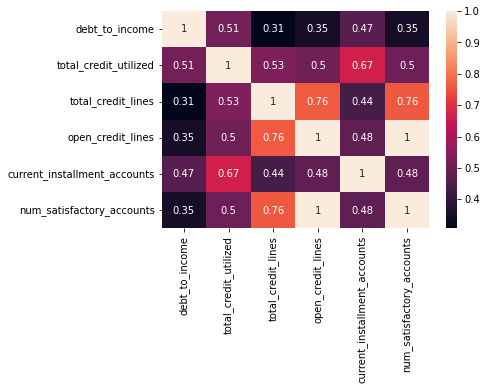

In [54]:
sns.heatmap(ndf.corr(method='spearman'),annot=True)